# **Pyber Data Analysis**

- The bubble plot shows that the majority of rides take place in urban cities, but average fares per ride are greater in rural cities. Suburban fares are generally greater than urban fares, but lower than rural fares. The pie charts show that urban cities make up the majority of total fares and total rides with over 60 percent of each and have 80 percent of total drivers. 


- The scatter plot suggests that, as the number of rides increases, the number of drivers also increases while the average fare decreases. While the average fares are lower in urban cities, drivers are more inclined to work there due to the greater availability of customers compared to suburban or rural cities.


- Suburban and rural cities are more spread out than urban ones, so average fares tend to be higher because the average ride will cover a greater distance. Because average fares are higher, potential customers will be more inclined to drive their own cars, reducing demand for rides and drivers. This is reflected in the last two pie charts, which show that these cities make up less than two thirds of total rides and less than 20 percent of total drivers.

In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left")

# Remove unneccesary columns
del pyber_df["date"]
del pyber_df["ride_id"]

# Display the data table for preview
pyber_df.head()

,city,fare,driver_count,type
0,Lake Jonathanshire,13.83,5,Urban
1,South Michelleport,30.24,72,Urban
2,Port Samanthamouth,33.44,57,Urban
3,Rodneyfort,23.44,34,Urban
4,South Jack,34.58,46,Urban


# Bubble Plot of Ride Sharing Data

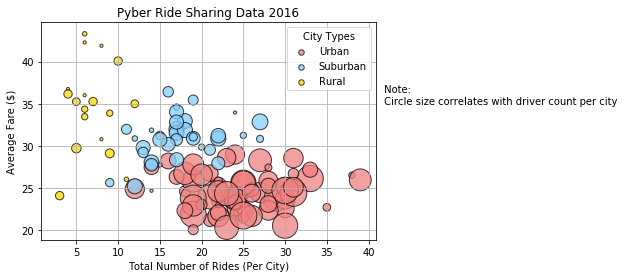

In [11]:
### Obtain the x and y coordinates for each of the three city types ###

# Split the full dataframe into separate dataframes to determine axes for each city type
pyber_urban = pyber_df.loc[pyber_df["type"] == "Urban"]
pyber_suburban = pyber_df.loc[pyber_df["type"] == "Suburban"]
pyber_rural = pyber_df.loc[pyber_df["type"] == "Rural"]

# Create groupby objects by city name for each city type to determine average fare per city
# Also use mean to get driver count per city
urban_group = pyber_urban.groupby("city")
urban_fare = urban_group["fare"].mean()
urban_drivers = urban_group["driver_count"].mean()

suburban_group = pyber_suburban.groupby("city")
suburban_fare = suburban_group["fare"].mean()
suburban_drivers = suburban_group["driver_count"].mean()

rural_group = pyber_rural.groupby("city")
rural_fare = rural_group["fare"].mean()
rural_drivers = rural_group["driver_count"].mean()

# Use value counts to determine total rides per city by city type
urban_rides = pyber_urban["city"].value_counts()
suburban_rides = pyber_suburban["city"].value_counts()
rural_rides = pyber_rural["city"].value_counts()

# User stored variables to create new dataframes for each city type
urban_rides_df = pd.DataFrame({"Total Rides": urban_rides, "Average Fare": urban_fare, "Driver Count": urban_drivers})
suburban_rides_df = pd.DataFrame({"Total Rides": suburban_rides, "Average Fare": suburban_fare, "Driver Count": suburban_drivers})
rural_rides_df = pd.DataFrame({"Total Rides": rural_rides, "Average Fare": rural_fare, "Driver Count": rural_drivers})

# Format Average Fare Column in each dataframe to two decimal places with a dollar sign
urban_rides_df["Average Fare"] = urban_rides_df["Average Fare"].map("{:.2f}".format)
suburban_rides_df["Average Fare"] = suburban_rides_df["Average Fare"].map("{:.2f}".format)
rural_rides_df["Average Fare"] = rural_rides_df["Average Fare"].map("{:.2f}".format)

# Convert Average Fare column to numeric
urban_rides_df["Average Fare"] = pd.to_numeric(urban_rides_df["Average Fare"])
suburban_rides_df["Average Fare"] = pd.to_numeric(suburban_rides_df["Average Fare"])
rural_rides_df["Average Fare"] = pd.to_numeric(rural_rides_df["Average Fare"])

### Build the scatter plots for each city types ###

# Create three scatter plots and use subplots to merge them into one set of axes
fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(urban_rides_df["Total Rides"], urban_rides_df["Average Fare"], color="lightcoral", 
           edgecolors="black", s=urban_drivers * 10, alpha=0.75, label="Urban")
ax.scatter(suburban_rides_df["Total Rides"], suburban_rides_df["Average Fare"], color="lightskyblue", 
           edgecolors="black", s=suburban_drivers * 10, alpha=0.75, label="Suburban")
ax.scatter(rural_rides_df["Total Rides"], rural_rides_df["Average Fare"], color="gold", 
           edgecolors="black", s=rural_drivers * 10, alpha=0.75, label="Rural")

### Incorporate the other graph properties ###

# Add title and name x & y labels
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add grid to the plot
plt.grid()

### Create a legend ###

# Create a legend and use legend handler to set markers to the same size
lgnd = ax.legend(["Urban","Suburban","Rural"],loc="best",title = "City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

### Incorporate a text label regarding circle size ###

# Add a text label regarding circle size
plt.annotate(" Note: \n Circle size correlates with driver count per city",xy=(41.5, 35), annotation_clip=False)

### Save Figure ###
plt.savefig("PyberBubble.png")

# Show plot
plt.show()


## Total Fares by City Type

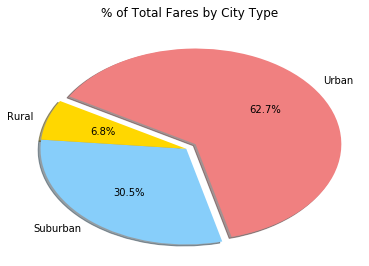

In [12]:
### Calculate Type Percents ###

# Calculate percentage of total fares for each city type
urban_fare_percent = round((pyber_urban["fare"].sum() / pyber_df["fare"].sum()) * 100 , 1)
suburban_fare_percent = round((pyber_suburban["fare"].sum() / pyber_df["fare"].sum()) * 100, 1)
rural_fare_percent = round((pyber_rural["fare"].sum() / pyber_df["fare"].sum()) * 100, 1)


### Build Pie Chart ###

# Create labels for pie chart
labels = ["Urban", "Suburban", "Rural"]

# Store percents for each type as the sizes
sizes = [urban_fare_percent, suburban_fare_percent, rural_fare_percent]

# Store colors in a list variable
colors = ["lightcoral", "lightskyblue", "gold"]

# Explode the Urban percentage
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, radius=1.25,
        autopct="%1.1f%%", shadow=True, startangle=150, counterclock=False)

plt.axis("tight")

plt.title("% of Total Fares by City Type \n")

### Save Figure ###
plt.savefig("FaresPie.png")

plt.show()

## Total Rides by City Type

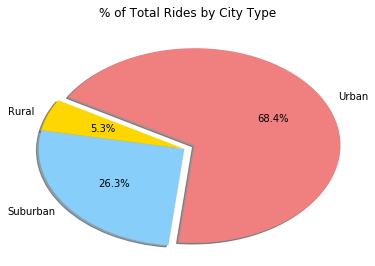

In [13]:
### Calculate Ride Percents ###

# Store percent of rides for each city type as a variable
urban_ride_percent = urban_rides / pyber_df["fare"].count()
urban_ride_percent = urban_ride_percent.sum()

suburban_ride_percent = suburban_rides / pyber_df["fare"].count()
suburban_ride_percent = suburban_ride_percent.sum()

rural_ride_percent = rural_rides / pyber_df["fare"].count()
rural_ride_percent = rural_ride_percent.sum()

### Build Pie Chart ###

# Create labels for pie chart
labels = ["Urban", "Suburban", "Rural"]

# Store percents for each type as the sizes
sizes = [urban_ride_percent, suburban_ride_percent, rural_ride_percent]

# Store colors in a list variable
colors = ["lightcoral", "lightskyblue", "gold"]

# Explode the Urban percentage
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, radius=1.25,
        autopct="%1.1f%%", shadow=True, startangle=150, counterclock=False)

plt.axis("tight")

plt.title("% of Total Rides by City Type \n")

### Save Figure ###
plt.savefig("RidesPie.png")

plt.show()

## Total Drivers by City Type

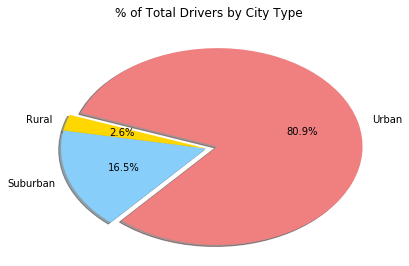

In [14]:
### Calculate Driver Percents ###

# Use previously made DFs to find number of drivers for each city group
urban_drivers = urban_rides_df["Driver Count"].sum()
suburban_drivers = suburban_rides_df["Driver Count"].sum()
rural_drivers = rural_rides_df["Driver Count"].sum()

# Sum each driver variable to find total drivers
total_drivers = urban_drivers + suburban_drivers + rural_drivers

# Divide city type drivers by total drivers to get percentage
urban_driver_percent = urban_drivers / total_drivers
suburban_driver_percent = suburban_drivers / total_drivers
rural_driver_percent = rural_drivers / total_drivers

### Build Pie Chart ###

# Create labels for pie chart
labels = ["Urban", "Suburban", "Rural"]

# Store percents for each type as the sizes
sizes = [urban_driver_percent, suburban_driver_percent, rural_driver_percent]

# Store colors in a list variable
colors = ["lightcoral", "lightskyblue", "gold"]

# Explode the Urban percentage
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, radius=1.25,
        autopct="%1.1f%%", shadow=True, startangle=160, counterclock=False)

plt.axis("tight")

plt.title("% of Total Drivers by City Type \n")

### Save Figure ###
plt.savefig("DriversPie.png")

plt.show()